In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
import sys
import os

# Add your script folder to Python path
script_path = "../scripts/data_cleaning.py"  # Update this path
sys.path.append(script_path)

# Verify
print(sys.path) 

['c:\\Program Files\\Python310\\python310.zip', 'c:\\Program Files\\Python310\\DLLs', 'c:\\Program Files\\Python310\\lib', 'c:\\Program Files\\Python310', '', 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python310\\site-packages', 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32', 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32\\lib', 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python310\\site-packages\\Pythonwin', 'c:\\Program Files\\Python310\\lib\\site-packages', '../scripts/data_cleaning.py', '../scripts/data_cleaning.py', '../scripts/data_cleaning.py']


In [5]:
df=pd.read_csv("../data/BrentOilPrices.csv")

In [6]:
print(df.head())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


Task 1: Data Analysis Workflow and Understanding the Model and Data 
1.1 Data Preprocessing and Exploratory Data Analysis (EDA)

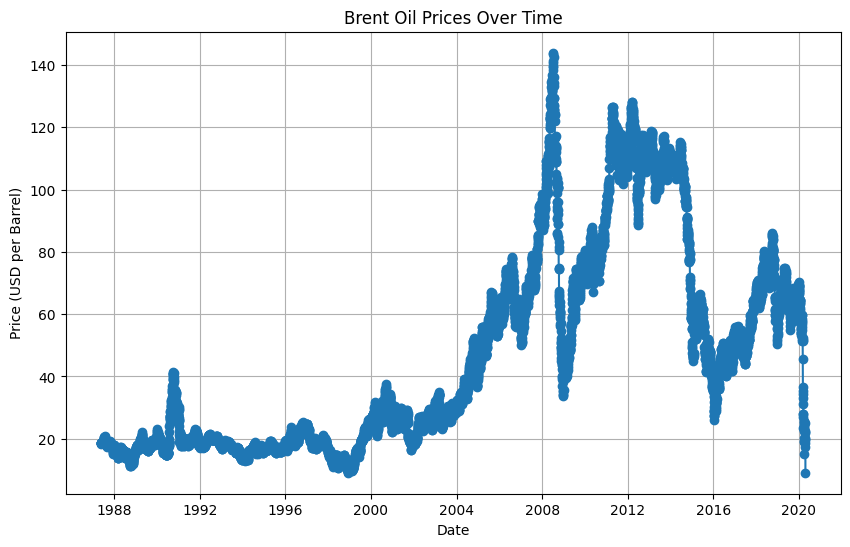

             Price
count  8360.000000
mean     46.459669
std      32.504671
min       9.100000
25%      18.780000
50%      31.750000
75%      67.042500
max     143.950000


In [7]:

# Convert 'Date' to datetime format
# Handling potential inconsistencies in the 'Date' column
# using the `dayfirst` argument to ensure correct day and month parsing
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce', dayfirst=False)

# errors='coerce' converts invalid dates to NaT (Not a Time)
# Drop rows with NaT in the 'Date' column
df.dropna(subset=['Date'], inplace=True)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], marker='o', linestyle='-')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.grid(True)
plt.show()

# Summary statistics
print(df.describe())

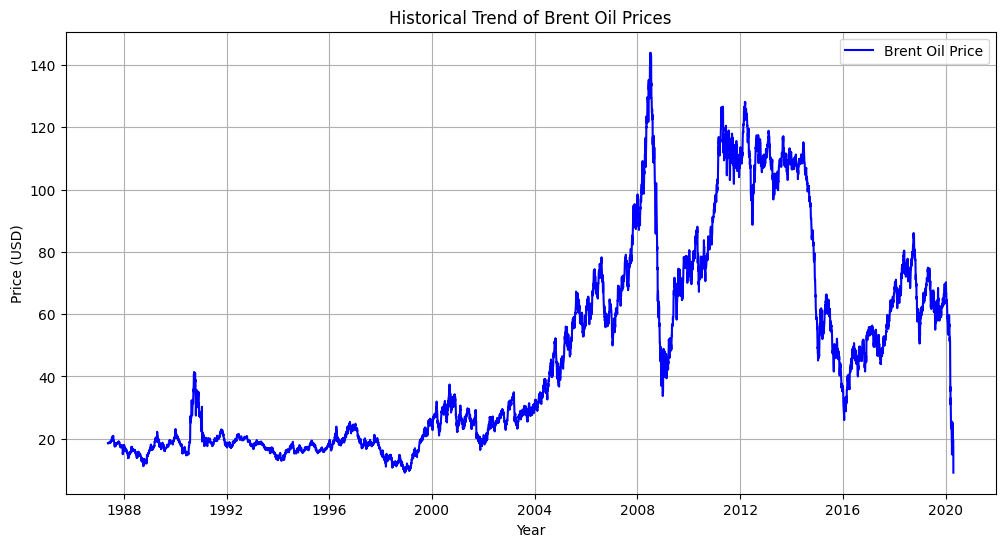

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'Date' column to datetime format
#df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")

# Sort by date
#df = df.sort_values(by="Date")

# Plot the price trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Brent Oil Price", color="blue", linewidth=1.5)
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Historical Trend of Brent Oil Prices")
plt.legend()
plt.grid(True)
plt.show()

1.2 Change Point Analysis

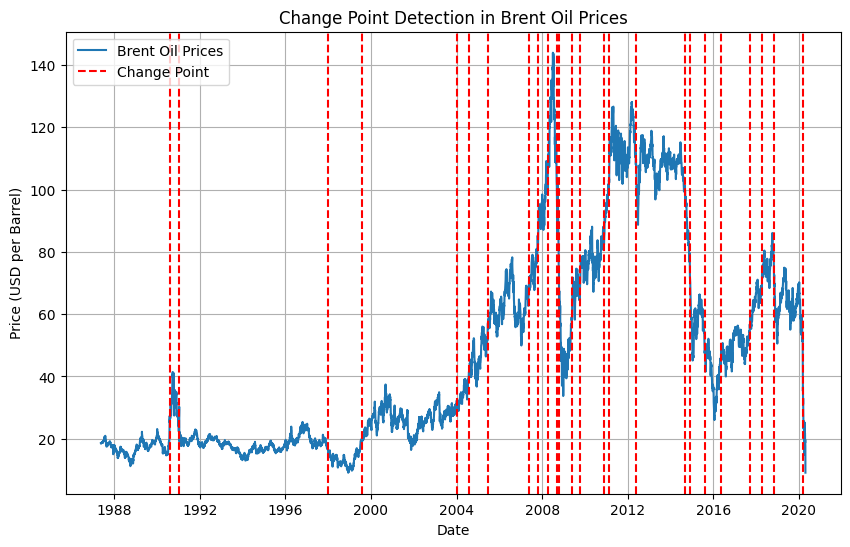

In [9]:

import ruptures as rpt

# Convert prices to a numpy array
prices = df['Price'].values

# Perform change point detection
algo = rpt.Pelt(model="rbf").fit(prices)
change_points = algo.predict(pen=10)  # Penalty parameter to control sensitivity

# Plot change points
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Brent Oil Prices')
for cp in change_points[:-1]:  # Exclude the last point (end of the series)
    plt.axvline(x=df.index[cp], color='r', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.title('Change Point Detection in Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend()
plt.grid(True)
plt.show()

Task 2: Statistical Modeling and Advanced Analysis

2.1 ARIMA Model for Time Series Forecasting

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer

Mean Squared Error: 2303.9727976201434


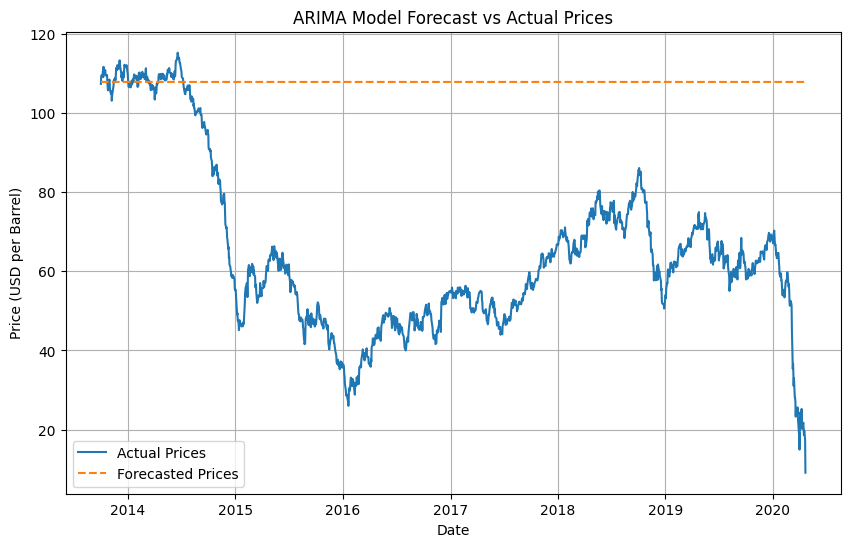

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train['Price'], order=(5, 1, 0))  # ARIMA(p,d,q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate model
mse = mean_squared_error(test['Price'], forecast)
print(f'Mean Squared Error: {mse}')

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='Actual Prices')
plt.plot(test.index, forecast, label='Forecasted Prices', linestyle='--')
plt.title('ARIMA Model Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend()
plt.grid(True)
plt.show()

2.2 GARCH Model for Volatility Analysis

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6227900.980277839
Iteration:      2,   Func. Count:     12,   Neg. LLF: 169925.03470477543
Iteration:      3,   Func. Count:     25,   Neg. LLF: 31072.427677104617
Iteration:      4,   Func. Count:     31,   Neg. LLF: 40020.38848391034
Iteration:      5,   Func. Count:     37,   Neg. LLF: 34239.6174435359
Iteration:      6,   Func. Count:     44,   Neg. LLF: 28088.200729927412
Iteration:      7,   Func. Count:     50,   Neg. LLF: 23499.665214679193
Iteration:      8,   Func. Count:     55,   Neg. LLF: 48015.701787240614
Iteration:      9,   Func. Count:     65,   Neg. LLF: 27651.97186180501
Iteration:     10,   Func. Count:     71,   Neg. LLF: 7677334638.932177
Iteration:     11,   Func. Count:     78,   Neg. LLF: 31333.39268134605
Iteration:     12,   Func. Count:     84,   Neg. LLF: 30092.99263480714
Iteration:     13,   Func. Count:     90,   Neg. LLF: 27855.79176743734
Iteration:     14,   Func. Count:     96,   Neg. LLF: 27413.

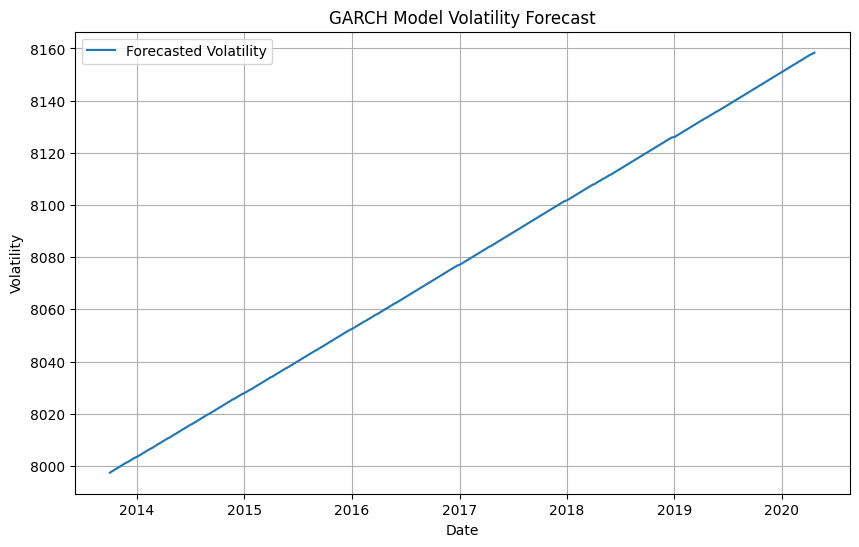

In [11]:
from arch import arch_model
# Split the data into training and testing sets (e.g., 80% train, 20% test)
split_index = int(0.8 * len(df))  # 80% of data for training
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Fit GARCH model
garch_model = arch_model(train['Price'], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

# Forecast volatility
forecast = garch_fit.forecast(horizon=len(test))

# Plot volatility
plt.figure(figsize=(10, 6))
plt.plot(test.index, forecast.variance.values[-1, :], label='Forecasted Volatility')
plt.title('GARCH Model Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

2.3 LSTM Model for Complex Pattern Capture

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
8355/8355 - 29s - 4ms/step - loss: 6.8042e-04
Epoch 2/100
8355/8355 - 27s - 3ms/step - loss: 2.6151e-04
Epoch 3/100
8355/8355 - 29s - 3ms/step - loss: 1.7697e-04
Epoch 4/100
8355/8355 - 32s - 4ms/step - loss: 1.4599e-04
Epoch 5/100
8355/8355 - 32s - 4ms/step - loss: 1.3587e-04
Epoch 6/100
8355/8355 - 31s - 4ms/step - loss: 1.2321e-04
Epoch 7/100
8355/8355 - 31s - 4ms/step - loss: 1.1853e-04
Epoch 8/100
8355/8355 - 31s - 4ms/step - loss: 1.1564e-04
Epoch 9/100
8355/8355 - 32s - 4ms/step - loss: 1.1325e-04
Epoch 10/100
8355/8355 - 32s - 4ms/step - loss: 1.0987e-04
Epoch 11/100
8355/8355 - 30s - 4ms/step - loss: 1.0318e-04
Epoch 12/100
8355/8355 - 30s - 4ms/step - loss: 1.0583e-04
Epoch 13/100
8355/8355 - 29s - 3ms/step - loss: 1.0445e-04
Epoch 14/100
8355/8355 - 28s - 3ms/step - loss: 9.8725e-05
Epoch 15/100
8355/8355 - 28s - 3ms/step - loss: 1.0292e-04
Epoch 16/100
8355/8355 - 29s - 3ms/step - loss: 9.8934e-05
Epoch 17/100
8355/8355 - 29s - 3ms/step - loss: 9.9074e-05
Epoch 

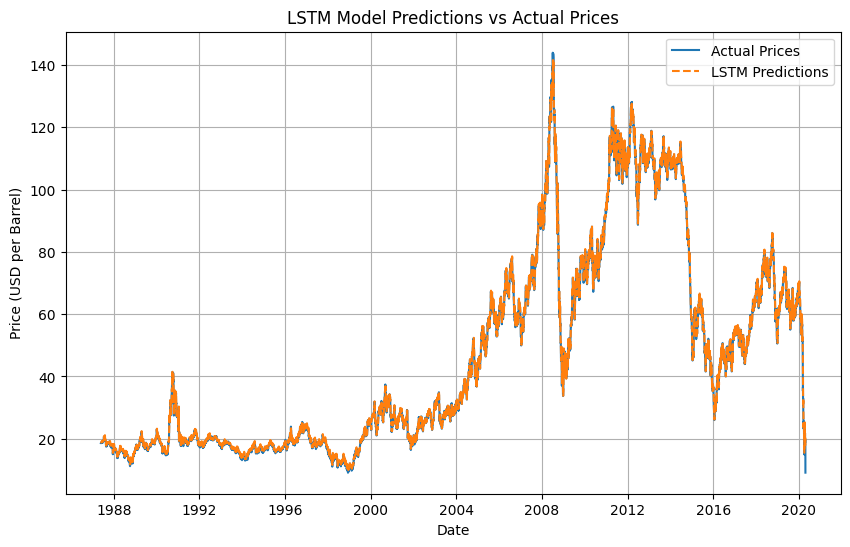

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Price']])

# Prepare data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

# Predict
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[time_step:], df['Price'][time_step:], label='Actual Prices')
plt.plot(df.index[time_step:], train_predict, label='LSTM Predictions', linestyle='--')
plt.title('LSTM Model Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend()
plt.grid(True)
plt.show()

Task 3: Developing an Interactive Dashboard

3.1 Backend (Flask)